<a href="https://colab.research.google.com/github/ItighneS/MLM-Project_Group23/blob/main/MLM_Project_1_055015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Project Information
- Unsupervised Learning Basics.
- Itighne Sinha 055015 | Ashwin Khandelwal 055008
- Group Number 23

#####2. Description of Data
 - Data Source https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000
 - Data Size: 2.69 MB
 - Data Type: Panel
 - Data Dimension: 16 Variables, 15000 Observations
 - Data Variable Type: Numeric-5 [3 Integers | 2 Decimal] | Non-Numeric - 11
 - Data Variable Category- I :  2 Index | Categorical - 9 Nominal | 1 Ordinal | 4 Non-Categorical
 - About Dataset: This is a detailed dataset of international trade transactions, providing extensive information on both imports and exports. Designed for use in business analytics, economic research, and financial modeling, it offers a broad view of trade activities with numerous attributes that capture various dimensions of each transaction.


#Project Objectives

####Unsupervised Machine Learning: Clustering

- Segmentation of Dataset using Unsupervised Machine Learning Clustering Algorithms
- Identification of appropriate number of Segments or Clusters
- Determination of Segment or Cluster Characteristics


# Missing Data Treatment Report

### 1. Introduction
This report provides a detailed account of the missing data treatment process, including the extent of missing data, methods applied for imputation, and the resultant modifications to the dataset.

### 2. Methodology

- **Quantifying Missing Data:**  
  - Percentage of missing records and variables was calculated.  
  - Records and variables with missing data exceeding the threshold were identified.  

- **Data Treatment:**  
  - Variables with missing data exceeding a threshold of `threshold_value%` were dropped.  
  - Records with missing data exceeding a threshold of `threshold_value%` were removed.  
  - Remaining missing values were imputed using the following methods:  
    - Mean for numerical variables.  
    - Median for skewed numerical variables.  
    - Mode for categorical variables.  

### 3. Results

| Measure            | Value                |  
|--------------------|---------------------|  
| Total Missing Data (%) | NA |  
| Variables Dropped      | NA |  
| Records Dropped        | NA |  
| Variables Imputed      | NA |  
| Imputation Method      | NA |  

### 4. Observations and Insights
- Missing data predominantly affected `high_missing_variables` (list of variables).  
- Imputation improved the dataset's usability but may introduce biases in `specific scenarios`.  

### 6. Conclusion
The missing data treatment enhanced the dataset's integrity for subsequent analysis. Continued monitoring and preventive measures are advised.

#Clustering Report


**1. Introduction**

This report presents the results of a cluster analysis performed on the preprocessed dataset. The goal of the analysis was to identify distinct groups or segments within the data based on their similarities.

**2. Methodology**

The K-Means clustering algorithm as well as the DBSCAN clustering algorithm was used for this analysis. The optimal number of clusters was determined using the Silhouette Score and Davies-Bouldin Score. The following steps were followed:

* **Data Preprocessing:** Relevant variables were selected, and the data was scaled using MinMaxScaler.
* **Clustering:** K-Means was applied with different numbers of clusters. DBSCAN Algorithm was applied.
* **Cluster Evaluation:** The Silhouette and Davies-Bouldin scores were calculated to assess the quality of the clusters.
* **Cluster Selection:** The optimal number of clusters was chosen based on the evaluation metrics.
* **Cluster Characterization:** The characteristics of each cluster were analyzed using descriptive statistics and visualizations.

**3. Results**

* **Optimal Number of Clusters:**

To determine the optimal number of clusters, we evaluated the performance of K-Means with 2 and 3 clusters using the Silhouette Score (sscore) and Davies-Bouldin Score (dbscore). The results are summarized in the following table:

|Number of Clusters | Silhouette Score | Davies-Bouldin Score |
|---|---|---|
|2|0.2465|1.6313|
|3|0.2439|1.3125|
|4|0.2641|1.1601|
|5|0.2701|1.0655|


Based on these scores, the 5-cluster model appears to be more appropriate.

* **Optimal Number of Clusters:** Based on the evaluation metrics, the optimal number of clusters was determined to be 5 by KMeans and 3 by DBSCAN.


#Insights

**Purpose of Segmentation**
- Better Understanding of Trade Patterns: By identifying clusters with distinct characteristics, we can gain insights into different types of trade activities, such as high-volume, low-value transactions vs. low-volume, high-value transactions.
- Targeted Business Strategies: Businesses can use this segmentation to tailor their strategies for different customer segments, such as offering specialized logistics solutions or pricing models for specific types of transactions.
- Risk Management: Identifying clusters with potentially risky characteristics (e.g., unusually high values or quantities) can help in fraud detection and risk mitigation.
- Improved Efficiency: By understanding the characteristics of different trade segments, businesses can optimize their operations, such as inventory management, shipping routes, and customs procedures.

**Cluster Names(K-Means)**

|Cluster No.|             Cluster Name|
|-----------|-------------------------|
|1          |               High Value|
|2          |   Low Quantity-Low Value|
|3          |             Low Quantity|
|4          |High Quantity- High Value|
|5          |  High Quantity-Low Value|


1. **High Value**: - Risk Management: Implement robust security measures for these transactions, including insurance and tracking, to mitigate potential losses. - Customer Relationship Management: Offer personalized service and premium support to build loyalty with high-value customers. - Pricing and Profitability: Consider premium pricing strategies for these transactions to reflect the higher value and associated risks.

2. **Low Quantity-Low Value**: - Operational Efficiency: Focus on minimizing shipping and handling costs by bundling items, optimizing warehouse operations, and potentially using consolidated shipping services. - Marketing and Sales: Encourage larger order sizes through promotions or bundling offers to increase transaction value. - Inventory Management: Maintain lower inventory levels for these items due to their lower demand and value.

3. **Low Quantity**: - Inventory Management: Optimize inventory levels to avoid overstocking while ensuring availability for customer demand. - Sales Strategies: Explore cross-selling and upselling opportunities to increase order sizes and customer lifetime value. - Logistics: Consider flexible shipping options to cater to individual customer preferences and order sizes.

4. **High Quantity-High Value**: - Strategic Partnerships: Build strong relationships with these key customers by offering tailored solutions and potentially negotiating volume-based contracts. - Supply Chain Optimization: Ensure a smooth and efficient supply chain to meet the demands of high-volume, high-value transactions. - Resource Allocation: Prioritize resources and support to these customers due to their significant contribution to revenue.

5. **High Quantity-Low Value**: - Logistics and Transportation: Negotiate favorable rates with shipping providers for large volumes, optimize routes, and consider utilizing more economical transportation methods. - Inventory Management: Implement efficient inventory control systems to manage the higher turnover of these goods. - Pricing Strategies: Offer competitive pricing and potentially volume discounts to attract and retain customers in this segment

#CODING

###DATA LOADING

In [140]:
# prompt: import libraries of pandas, numpy, sklearn, statsmodels with their usual abbrievations
import pandas as pd
import numpy as np
import sklearn
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.descriptivestats as dstats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch  # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus  # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [141]:
import pandas as pd
import requests
from io import StringIO

# Replace with your actual file ID
file_id = '1xLuwO7AK_N0XZEf3bPWS_OK-i_rJHv1g'

# Construct the URL
url = f'https://drive.google.com/uc?id={file_id}'

# Fetch the data using requests
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the data into a pandas DataFrame using StringIO
is15_ds = pd.read_csv(StringIO(response.text))

# Display the first few rows of the DataFrame
is15_ds.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,1979,9506.57,07-12-2023,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,5763,7100.91,04-04-2023,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,far,Import,5740,2450.34,21-08-2024,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,2592,7226.42,09-05-2022,Furniture,Adamfort,996084,4886.14,Air,Schroeder-Smith,Jacob Gray,63216265,Net 60
4,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,2622,2817.29,03-04-2023,Electronics,Juliebury,555981,4406.74,Air,Zimmerman LLC,Amy Stephens,94600248,Cash on Delivery


In [142]:
is15_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12  Supplier         15000 non-null  object 
 13  Customer         15000 non-null  object 
 14  Invoice_Number   15000 non-null  int64  
 15  Payment_Terms    15000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 1.8+ MB


In [143]:
is15_ss=is15_ds.sample(n=5001,random_state=55008015); is15_ss.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
11792,75366455-55c2-43b8-9567-26bc7c0e52ae,Equatorial Guinea,evidence,Export,8904,403.71,10-10-2022,Electronics,Port Alejandramouth,235183,1085.68,Land,"Holmes, Brock and Byrd",Teresa Chaney,39363062,Prepaid
5940,86b703eb-6f50-4df1-b3d8-49ba47d8af8e,Madagascar,study,Export,8813,9681.59,01-11-2020,Toys,New Amanda,517835,2026.33,Land,"Galloway, Hoover and Martin",Katherine Roberts,38698421,Prepaid
11656,99071d74-0d04-46b1-a44c-3e541b81bb06,Moldova,know,Import,7737,6535.45,13-01-2022,Furniture,Lake David,480613,57.78,Land,Chavez Inc,Kristopher Taylor,93050127,Cash on Delivery
624,2982100c-0372-4e33-8550-7d2b909e7f78,Congo,voice,Import,1308,5090.19,01-05-2022,Electronics,Shannonview,235074,1997.60,Land,"Jones, Martinez and Ponce",Justin Wells,71973788,Net 60
3912,90feb07a-a0e3-4935-b515-59fdb68b6049,Singapore,order,Import,9907,9877.61,19-10-2020,Furniture,Lake Loganshire,367596,1903.48,Sea,Weber-Martin,Crystal Vaughn,16044415,Cash on Delivery


In [144]:
is15_ss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 11792 to 9022
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   5001 non-null   object 
 1   Country          5001 non-null   object 
 2   Product          5001 non-null   object 
 3   Import_Export    5001 non-null   object 
 4   Quantity         5001 non-null   int64  
 5   Value            5001 non-null   float64
 6   Date             5001 non-null   object 
 7   Category         5001 non-null   object 
 8   Port             5001 non-null   object 
 9   Customs_Code     5001 non-null   int64  
 10  Weight           5001 non-null   float64
 11  Shipping_Method  5001 non-null   object 
 12  Supplier         5001 non-null   object 
 13  Customer         5001 non-null   object 
 14  Invoice_Number   5001 non-null   int64  
 15  Payment_Terms    5001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 664.2+ KB


In [145]:
is15_ss.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = is15_ss.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 11792 to 9022
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   5001 non-null   object 
 1   Country          5001 non-null   object 
 2   Product          5001 non-null   object 
 3   Import_Export    5001 non-null   object 
 4   Quantity         5001 non-null   int64  
 5   Value            5001 non-null   float64
 6   Date             5001 non-null   object 
 7   Category         5001 non-null   object 
 8   Port             5001 non-null   object 
 9   Customs_Code     5001 non-null   int64  
 10  Weight           5001 non-null   float64
 11  Shipping_Method  5001 non-null   object 
 12  Supplier         5001 non-null   object 
 13  Customer         5001 non-null   object 
 14  Invoice_Number   5001 non-null   int64  
 15  Payment_Terms    5001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 664.2+ KB


,0
Transaction_ID,0
Country,0
Product,0
Import_Export,0
Quantity,0
Value,0
Date,0
Category,0
Port,0
Customs_Code,0


In [146]:
record_missing_data = is15_ss.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

,0
11792,0
4631,0
14999,0
13259,0
12716,0


###Bifurcation of Data


In [147]:
is15_ss_cat = is15_ss[['Country', 'Product', 'Import_Export', 'Category', 'Customs_Code', 'Shipping_Method', 'Supplier', 'Customer','Payment_Terms']]
is15_ss_cat_nom = is15_ss[['Country', 'Product', 'Import_Export', 'Category', 'Port','Customs_Code', 'Shipping_Method', 'Supplier', 'Customer']]
is15_ss_cat_ord = is15_ss[['Payment_Terms']]
is15_ss_ncat = is15_ss[['Quantity', 'Value', 'Weight','Date']]
is15_ss_index = is15_ss[['Transaction_ID', 'Invoice_Number']]

###PreProcessing


In [148]:
is15_ss_dummy = is15_ss.copy()

In [149]:
is15_encoder = OrdinalEncoder()
categorical_cols = is15_ss_cat.select_dtypes(include=['object','string']).columns
is15_ss_cat_encoded = is15_encoder.fit_transform(is15_ss_cat[categorical_cols])
is15_ss_cat_encoded = pd.DataFrame(is15_ss_cat_encoded, columns=categorical_cols, index=is15_ss_cat.index)
is15_ss_encoded = pd.concat([is15_ss.drop(categorical_cols, axis=1), is15_ss_cat_encoded], axis=1)

In [150]:
is15_ss_encoded.head()

,Transaction_ID,Quantity,Value,Date,Port,Customs_Code,Weight,Invoice_Number,Country,Product,Import_Export,Category,Shipping_Method,Supplier,Customer,Payment_Terms
11792,75366455-55c2-43b8-9567-26bc7c0e52ae,8904,403.71,10-10-2022,Port Alejandramouth,235183,1085.68,39363062,64.00,276.00,0.00,1.00,1.00,1838.00,4449.00,3.00
5940,86b703eb-6f50-4df1-b3d8-49ba47d8af8e,8813,9681.59,01-11-2020,New Amanda,517835,2026.33,38698421,127.00,810.00,0.00,4.00,1.00,1274.00,2580.00,3.00
11656,99071d74-0d04-46b1-a44c-3e541b81bb06,7737,6535.45,13-01-2022,Lake David,480613,57.78,93050127,140.00,435.00,1.00,2.00,1.00,661.00,2814.00,0.00
624,2982100c-0372-4e33-8550-7d2b909e7f78,1308,5090.19,01-05-2022,Shannonview,235074,1997.60,71973788,49.00,905.00,1.00,1.00,1.00,2090.00,2533.00,2.00
3912,90feb07a-a0e3-4935-b515-59fdb68b6049,9907,9877.61,19-10-2020,Lake Loganshire,367596,1903.48,16044415,196.00,578.00,1.00,2.00,2.00,4280.00,1073.00,0.00


In [151]:
# Scaling
is15_scaler = MinMaxScaler()
numerical_cols = is15_ss_ncat.select_dtypes(include=['number']).columns
is15_ss_ncat_scaled = is15_scaler.fit_transform(is15_ss_ncat[numerical_cols])
is15_ss_ncat_scaled = pd.DataFrame(is15_ss_ncat_scaled, columns=numerical_cols, index=is15_ss_ncat.index)
is15_ss_ppd = pd.concat([is15_ss_encoded.drop(numerical_cols, axis=1), is15_ss_ncat_scaled], axis=1)

In [152]:
is15_ss_ppd.head()

,Transaction_ID,Date,Port,Customs_Code,Invoice_Number,Country,Product,Import_Export,Category,Shipping_Method,Supplier,Customer,Payment_Terms,Quantity,Value,Weight
11792,75366455-55c2-43b8-9567-26bc7c0e52ae,10-10-2022,Port Alejandramouth,235183,39363062,64.00,276.00,0.00,1.00,1.00,1838.00,4449.00,3.00,0.89,0.03,0.22
5940,86b703eb-6f50-4df1-b3d8-49ba47d8af8e,01-11-2020,New Amanda,517835,38698421,127.00,810.00,0.00,4.00,1.00,1274.00,2580.00,3.00,0.88,0.97,0.41
11656,99071d74-0d04-46b1-a44c-3e541b81bb06,13-01-2022,Lake David,480613,93050127,140.00,435.00,1.00,2.00,1.00,661.00,2814.00,0.00,0.77,0.65,0.01
624,2982100c-0372-4e33-8550-7d2b909e7f78,01-05-2022,Shannonview,235074,71973788,49.00,905.00,1.00,1.00,1.00,2090.00,2533.00,2.00,0.13,0.50,0.40
3912,90feb07a-a0e3-4935-b515-59fdb68b6049,19-10-2020,Lake Loganshire,367596,16044415,196.00,578.00,1.00,2.00,2.00,4280.00,1073.00,0.00,0.99,0.99,0.38


###Descriptive Stats

In [153]:
is15_ppd_cat = is15_ss_ppd[['Country', 'Product', 'Port' ,'Import_Export', 'Category', 'Customs_Code', 'Shipping_Method', 'Supplier', 'Customer','Payment_Terms']]
is15_ppd_cat_nom = is15_ss_ppd[['Country', 'Product', 'Port','Import_Export', 'Category', 'Customs_Code', 'Shipping_Method', 'Supplier', 'Customer']]
is15_ppd_cat_ord = is15_ss_ppd[['Payment_Terms']]
is15_ppd_ncat = is15_ss_ppd[['Quantity', 'Value', 'Weight','Date']]
is15_ppd_index = is15_ss_ppd[['Transaction_ID', 'Invoice_Number']]

####Categorical Variable


In [154]:
def categorical_analysis(df):
    results = []
    for column in df.columns:
        mode_values = df[column].mode()
        mode = mode_values.iloc[0] if not mode_values.empty else np.nan
        frequency = df[column].value_counts().get(mode, 0)



        row = {
            'Variable': column,
            'Count': df[column].count(),
            'Mode': mode,
            'Frequency': frequency,
        }

        # ... (calculations for ordinal variables) ...

        results.append(row)

    return pd.DataFrame(results)

# Apply the function to your DataFrame
analysis_results_df = categorical_analysis(is15_ppd_cat)

# Display the table
display(analysis_results_df)

,Variable,Count,Mode,Frequency
0,Country,5001,49.00,44
1,Product,5001,118.00,12
2,Port,5001,West Michael,10
3,Import_Export,5001,1.00,2521
4,Category,5001,0.00,1023
5,Customs_Code,5001,235090,2
6,Shipping_Method,5001,2.00,1724
7,Supplier,5001,3756.00,7
8,Customer,5001,2745.00,5
9,Payment_Terms,5001,0.00,1276


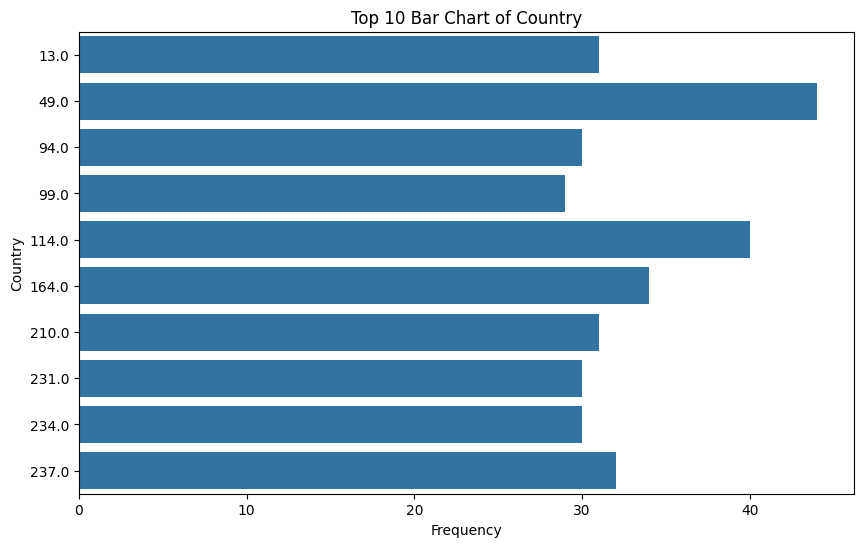

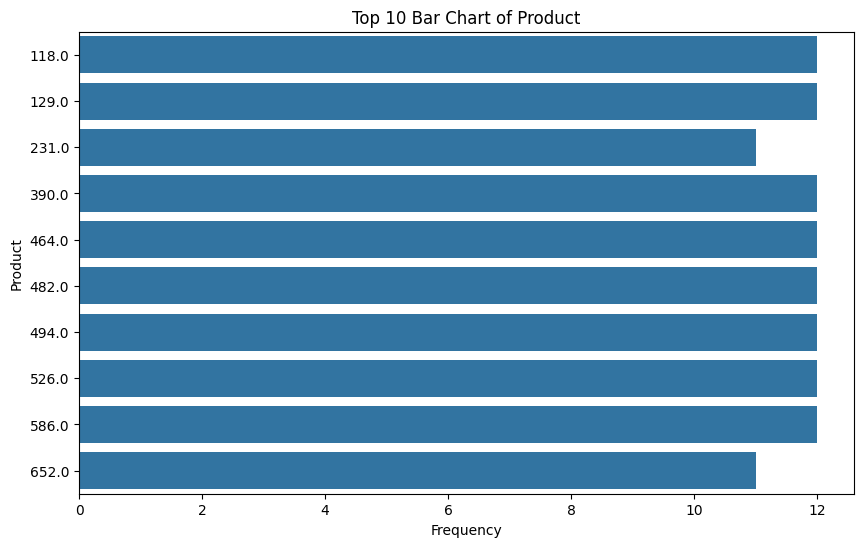

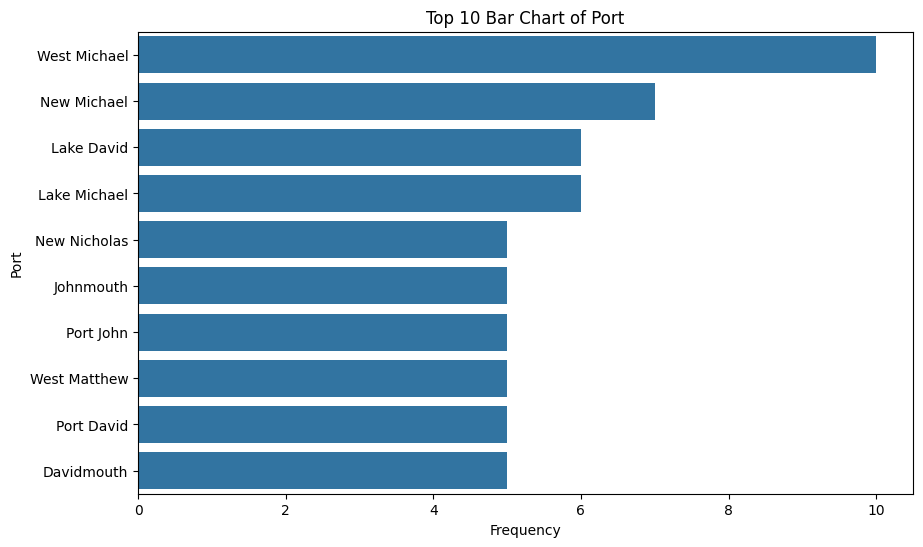

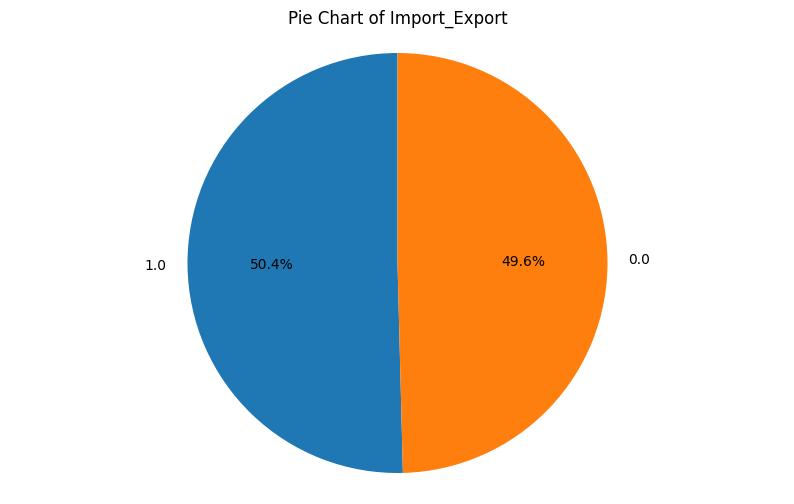

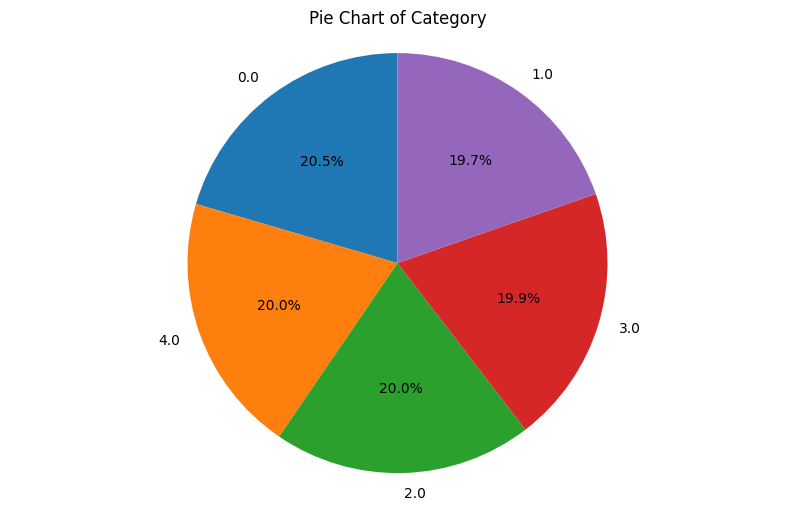

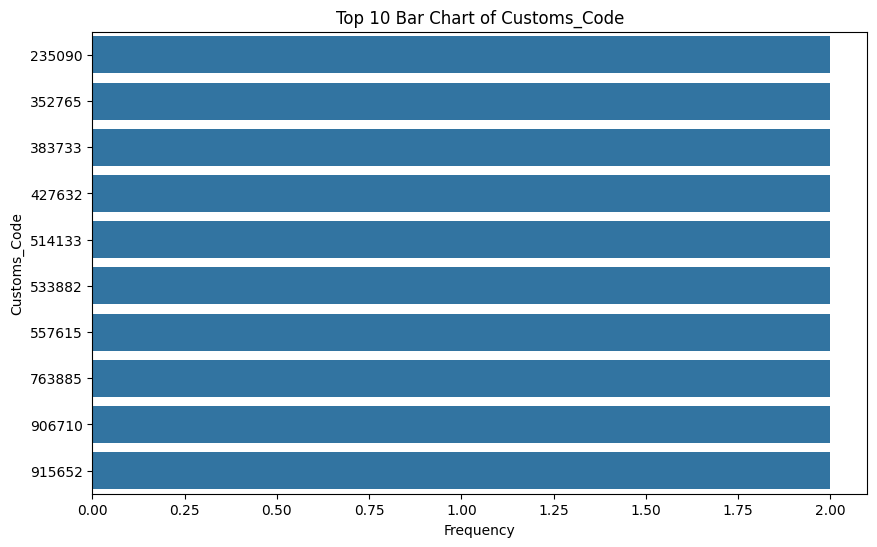

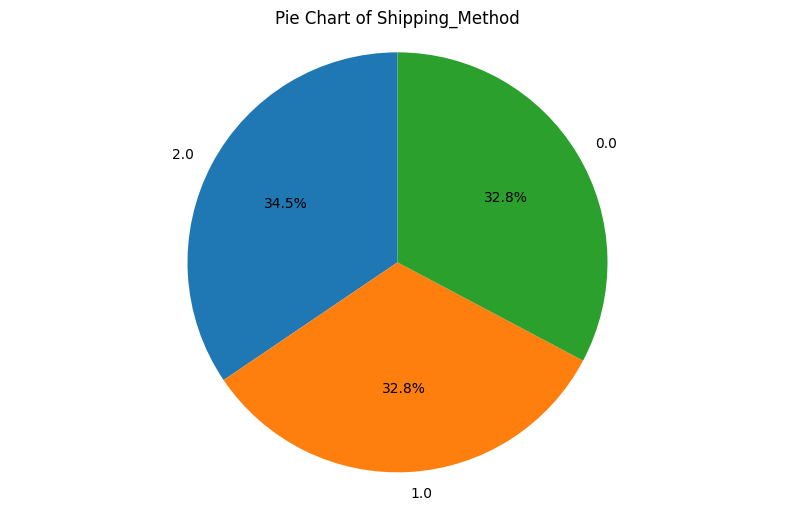

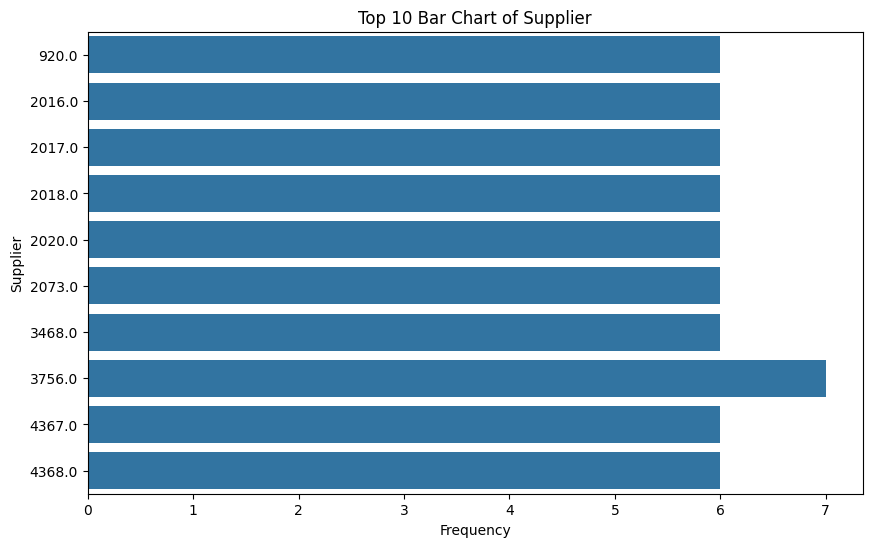

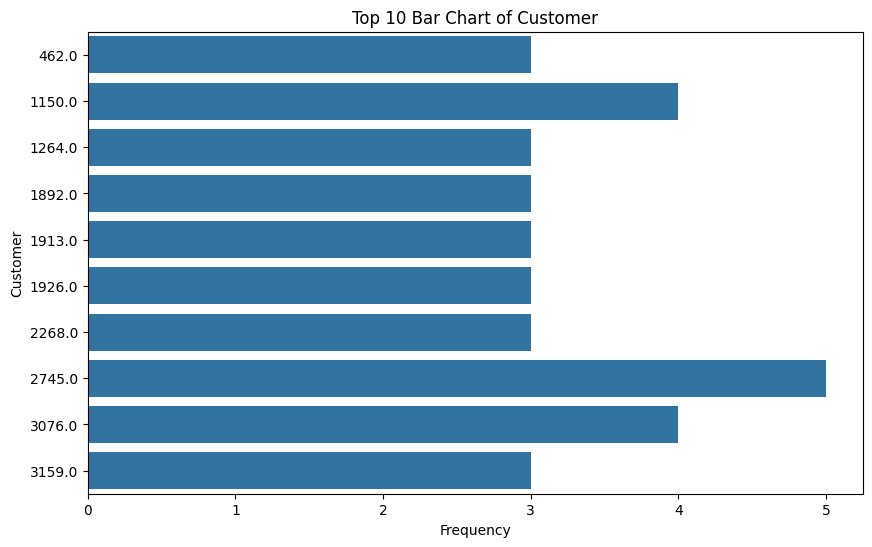

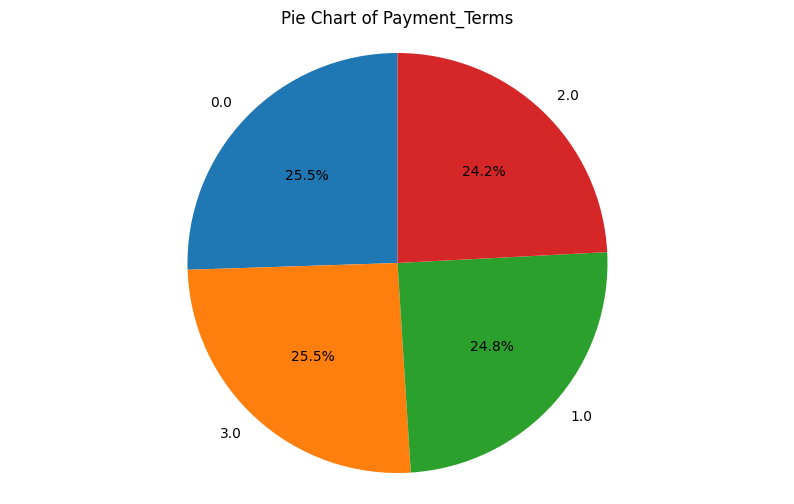

In [155]:
def plot_categorical_data(df, top_n=10):
    categorical_cols = is15_ppd_cat.columns  # Get all categorical columns

    for col in categorical_cols:
        # Count the occurrences of each category
        counts = df[col].value_counts()

        # Check the number of unique values to decide visualization type
        num_unique = len(counts)

        plt.figure(figsize=(10, 6))

        if num_unique <= 10:
            # Pie chart for categories with <= 10 unique values
            plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'Pie Chart of {col}')
            plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
        elif num_unique <= 20:
            # Horizontal bar chart for categories with > 10 and <= 20 unique values
            sns.barplot(x=counts.values, y=counts.index, orient='h')
            plt.title(f'Bar Chart of {col}')
            plt.xlabel('Frequency')
            plt.ylabel(col)
        else:
            # Top N categories for larger datasets (>20 unique values)
            top_counts = counts.head(top_n)
            sns.barplot(x=top_counts.values, y=top_counts.index, orient='h')
            plt.title(f'Top {top_n} Bar Chart of {col}')
            plt.xlabel('Frequency')
            plt.ylabel(col)

        plt.show()

# Example usage with your dataset 'is15_ppd_cat'
plot_categorical_data(is15_ppd_cat)


####Non-Categorical Variable

In [156]:
is15_ppd_ncat_desc = dstats.Description(is15_ppd_ncat).frame
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(is15_ppd_ncat_desc)

                  Quantity   Value  Weight
nobs               5001.00 5001.00 5001.00
missing               0.00    0.00    0.00
mean                  0.50    0.50    0.50
std_err               0.00    0.00    0.00
upper_ci              0.51    0.50    0.51
lower_ci              0.49    0.49    0.49
std                   0.29    0.29    0.29
iqr                   0.50    0.50    0.51
iqr_normal            0.37    0.37    0.38
mad                   0.25    0.25    0.25
mad_normal            0.31    0.31    0.32
coef_var              0.58    0.58    0.59
range                 1.00    1.00    1.00
max                   1.00    1.00    1.00
min                   0.00    0.00    0.00
skew                  0.01    0.01    0.03
kurtosis              1.81    1.81    1.78
jarque_bera         294.31  296.65  312.19
jarque_bera_pval      0.00    0.00    0.00
mode                  0.02    0.01    0.09
mode_freq             0.00    0.00    0.00
median                0.50    0.50    0.50
1%         

Visualization of Descriptive


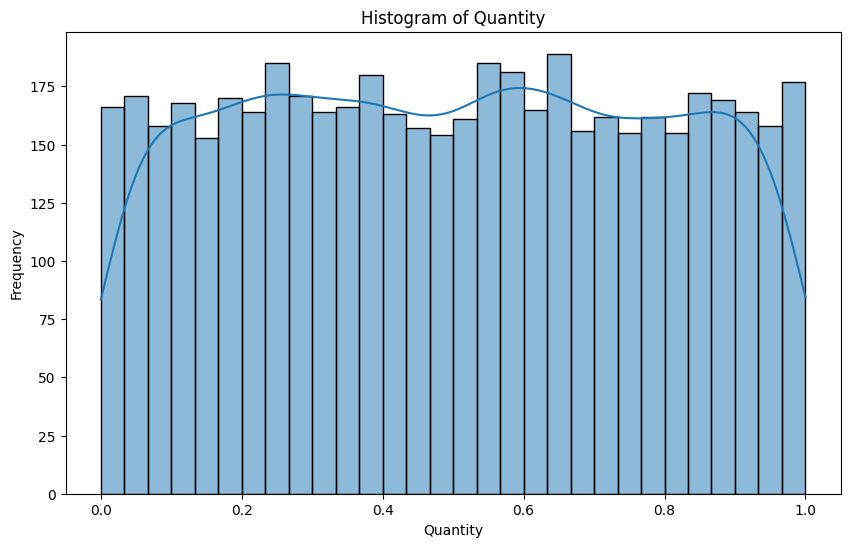

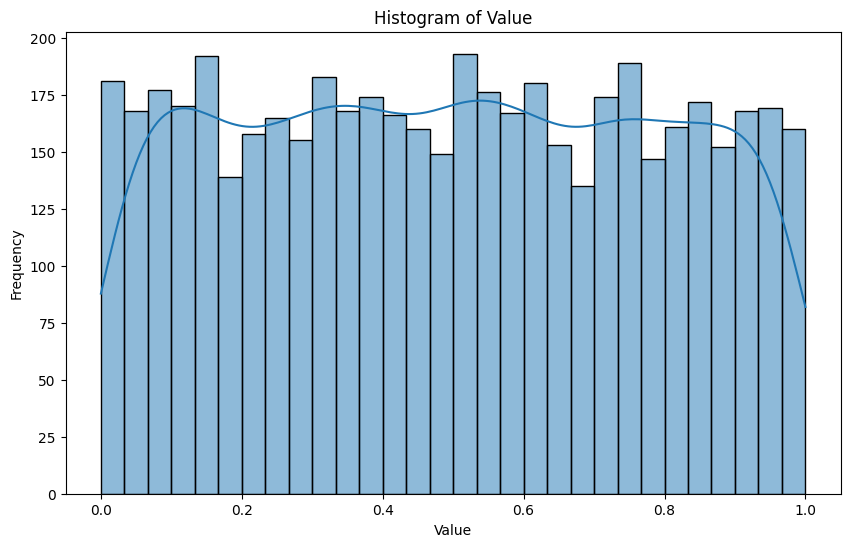

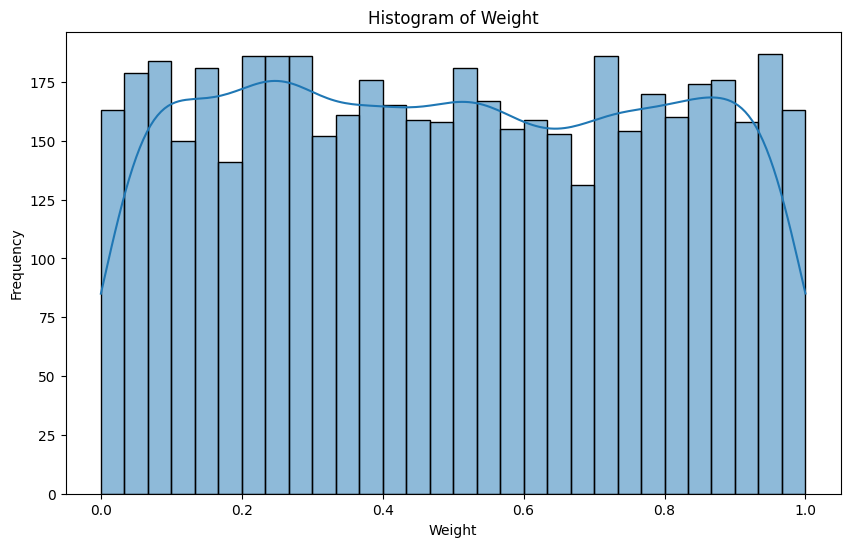

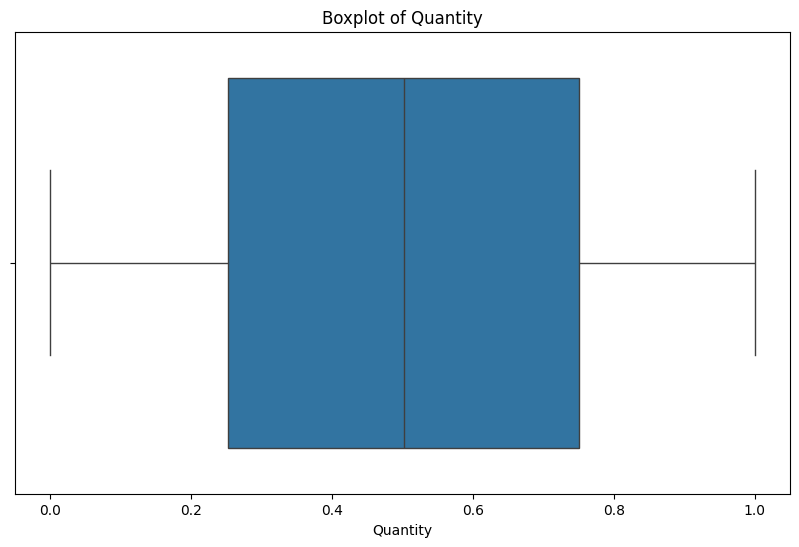

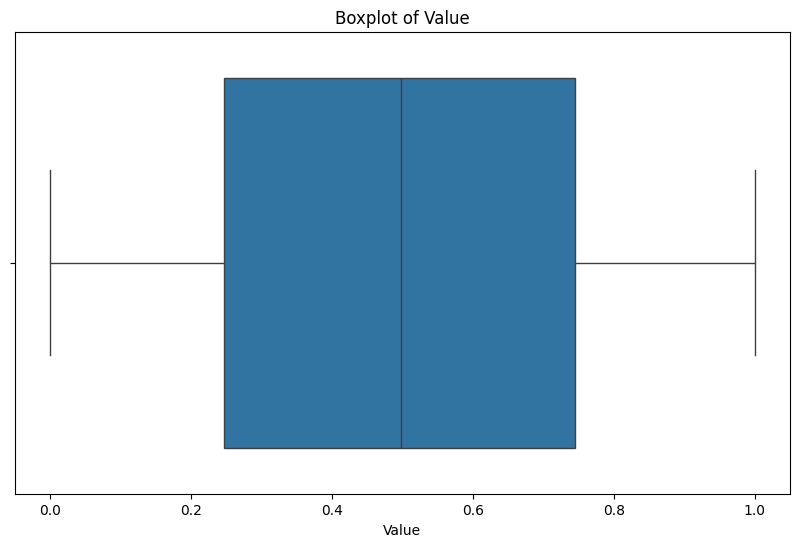

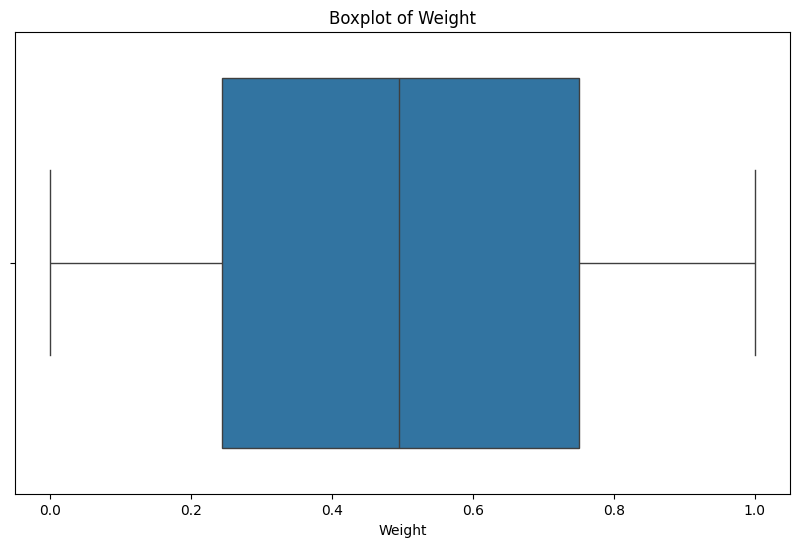

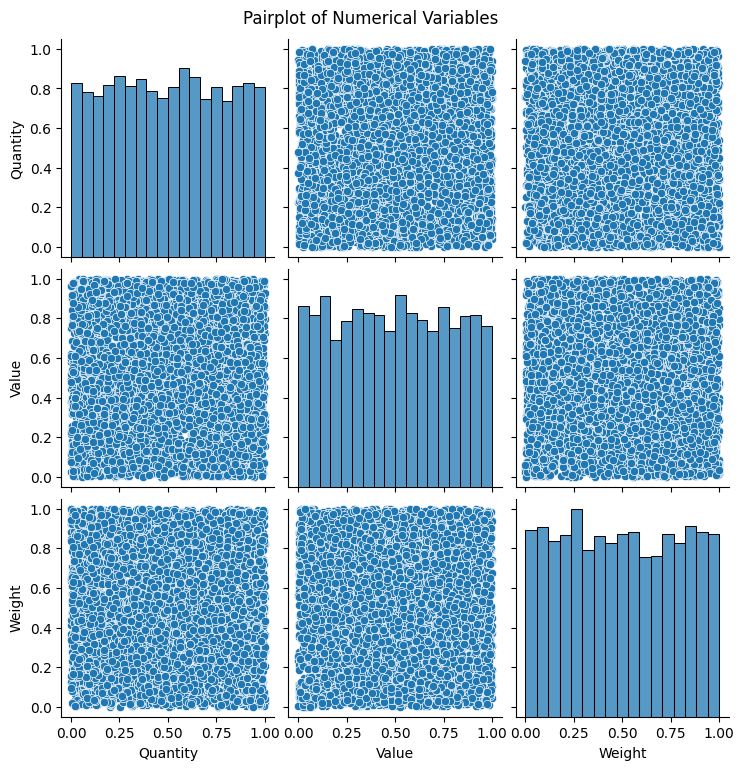

In [157]:
def plot_numerical_data(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Get all numerical columns

    # Histogram for each numerical variable
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=30)  # KDE (Kernel Density Estimation) for a smooth curve
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Boxplot for each numerical variable
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()


    # Pairplot (if the number of numerical columns is small enough)
    if len(numerical_cols) <= 5:  # Limit to a manageable number of variables for pairplot
        sns.pairplot(df[numerical_cols])
        plt.suptitle('Pairplot of Numerical Variables', y=1.02)
        plt.show()

# Example usage with your dataset 'is15_ppd_ncat'
plot_numerical_data(is15_ppd_ncat)

###Cluster Analysis

In [158]:
is15_ppd_subset = is15_ss_ppd[['Quantity', 'Value', 'Weight']]
is15_ppd_subset.head()

,Quantity,Value,Weight
11792,0.89,0.03,0.22
5940,0.88,0.97,0.41
11656,0.77,0.65,0.01
624,0.13,0.50,0.40
3912,0.99,0.99,0.38


####K-Means Clusters

In [159]:
is15_km_2cluster = kmclus(n_clusters=2, init='random', random_state=55008015)
is15_km_2cluster_model = is15_km_2cluster.fit_predict(is15_ppd_subset); is15_km_2cluster_model

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [160]:
is15_km_3cluster = kmclus(n_clusters=3, init='random', random_state=55008015)
is15_km_3cluster_model = is15_km_3cluster.fit_predict(is15_ppd_subset); is15_km_3cluster_model

array([0, 2, 2, ..., 1, 0, 2], dtype=int32)

In [161]:
is15_km_4cluster = kmclus(n_clusters=4, init='random', random_state=55008015)
is15_km_4cluster_model = is15_km_4cluster.fit_predict(is15_ppd_subset); is15_km_4cluster_model

array([1, 0, 1, ..., 2, 1, 3], dtype=int32)

In [162]:
is15_km_5cluster = kmclus(n_clusters=5, init='random', random_state=55008015)
is15_km_5cluster_model = is15_km_5cluster.fit_predict(is15_ppd_subset); is15_km_5cluster_model

array([4, 3, 0, ..., 2, 4, 1], dtype=int32)

In [163]:
is15_sscore_km_2cluster = sscore(is15_ppd_subset, is15_km_2cluster_model);
print(f'2-Cluster SScore ={is15_sscore_km_2cluster}')
is15_dbscore_km_2cluster = dbscore(is15_ppd_subset, is15_km_2cluster_model);
print(f'2-Cluster DBScore ={is15_dbscore_km_2cluster}')

2-Cluster SScore =0.24650954421087307
2-Cluster DBScore =1.63131875144395


In [164]:
is15_sscore_km_3cluster = sscore(is15_ppd_subset, is15_km_3cluster_model);
print(f'3-Cluster SScore ={is15_sscore_km_3cluster}')
is15_dbscore_km_3cluster = dbscore(is15_ppd_subset, is15_km_3cluster_model);
print(f'3-Cluster DBScore ={is15_dbscore_km_3cluster}')

3-Cluster SScore =0.24398513876880268
3-Cluster DBScore =1.3125428332808107


In [165]:
is15_sscore_km_4cluster = sscore(is15_ppd_subset, is15_km_4cluster_model);
print(f'4-Cluster SScore ={is15_sscore_km_4cluster}')
is15_dbscore_km_4cluster = dbscore(is15_ppd_subset, is15_km_4cluster_model);
print(f'4-Cluster DBScore ={is15_dbscore_km_4cluster}')

4-Cluster SScore =0.2641652341516818
4-Cluster DBScore =1.1601299190554684


In [166]:
is15_sscore_km_5cluster = sscore(is15_ppd_subset, is15_km_5cluster_model);
print(f'5-Cluster SScore ={is15_sscore_km_5cluster}')
is15_dbscore_km_5cluster = dbscore(is15_ppd_subset, is15_km_5cluster_model);
print(f'5-Cluster DBScore ={is15_dbscore_km_5cluster}')

5-Cluster SScore =0.2701525426924807
5-Cluster DBScore =1.0655981331376179


In [167]:
is15_ppd_subset_kmcluster = is15_ppd_subset.copy()
is15_ppd_subset_kmcluster.reset_index(level=0, inplace=True, names='index')
is15_ppd_subset_kmcluster['cluster_number'] = is15_km_5cluster_model
is15_ppd_subset_kmcluster.sort_values('cluster_number', inplace=True)
print(is15_ppd_subset_kmcluster)

      index  Quantity  Value  Weight  cluster_number
2052   5946      0.83   0.92    0.00               0
1982   9241      0.28   0.82    0.46               0
1972   8762      0.22   0.73    0.19               0
1967   9676      0.17   0.66    0.17               0
1965   9609      0.51   0.77    0.35               0
...     ...       ...    ...     ...             ...
2697   7350      0.91   0.39    0.29               4
2696  12411      0.82   0.42    0.62               4
2695   4536      0.91   0.55    0.38               4
2736  10057      0.49   0.28    0.51               4
2500   6881      0.88   0.63    0.37               4

[5001 rows x 5 columns]


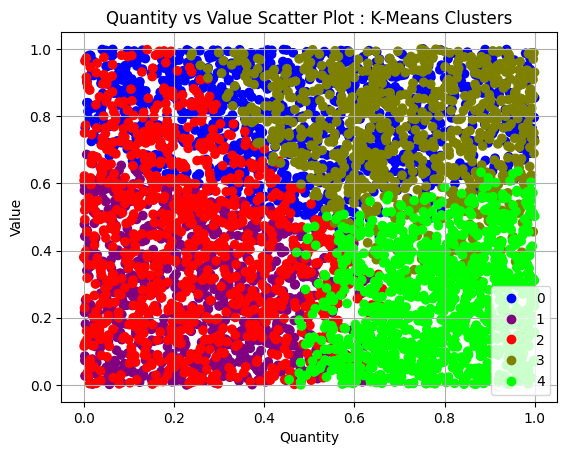

In [168]:
# Get unique K-Means cluster labels
is15_cluster_labels_km = list(is15_ppd_subset_kmcluster['cluster_number'].unique())

# Scatter plot (using 'Quantity', 'Weight', and 'Value' as the new variables)
is15_scatter_plot_km = plt.scatter(
    x=is15_ppd_subset_kmcluster['Quantity'],
    y=is15_ppd_subset_kmcluster['Value'],
    c=is15_ppd_subset_kmcluster['cluster_number'],
    cmap='brg'
)

# Add legend
plt.legend(handles=is15_scatter_plot_km.legend_elements()[0], labels=is15_cluster_labels_km)
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.title('Quantity vs Value Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

####DB Scan Clustering.

In [169]:


# DBSCAN clustering with tuned eps
dbscan_cluster = DBSCAN(eps=0.073, min_samples=5, metric='euclidean')  # Adjust min_samples if needed
dbscan_model = dbscan_cluster.fit_predict(is15_ppd_subset)

print("DBSCAN model:", dbscan_model)

# Count clusters (excluding noise labeled as -1)
n_clusters = len(set(dbscan_model)) - (1 if -1 in dbscan_model else 0)
n_noise = list(dbscan_model).count(-1)
print(f"Number of clusters: {n_clusters}, Noise points: {n_noise}")



DBSCAN model: [0 0 0 ... 0 0 0]
Number of clusters: 4, Noise points: 42


In [170]:
valid_labels_dbs = dbscan_model[dbscan_model != -1]
valid_data_dbs = is15_ppd_subset[dbscan_model != -1]

# Calculate Silhouette Score for the entire dataset (excluding noise points)
if len(valid_labels_dbs) > 1:  # Ensure at least 2 points remain
    is15_sscore_dbs = sscore(valid_data_dbs, valid_labels_dbs)
    print(f'DBS Silhouette Score (excluding noise) = {is15_sscore_dbs}')
else:
    print("Not enough data points to calculate Silhouette Score.")
if len(valid_labels_dbs) > 1:  # Ensure at least 2 points remain
    is15_dbscore_dbs = dbscore(valid_data_dbs, valid_labels_dbs)
    print(f'DBS DBScore (Davies-Bouldin Index) = {is15_dbscore_dbs}')
else:
    print("Not enough data points to calculate DBScore.")


DBS Silhouette Score (excluding noise) = -0.022171745314484733
DBS DBScore (Davies-Bouldin Index) = 0.7498492303965831


<ipython-input-171-69b87d534d0e>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


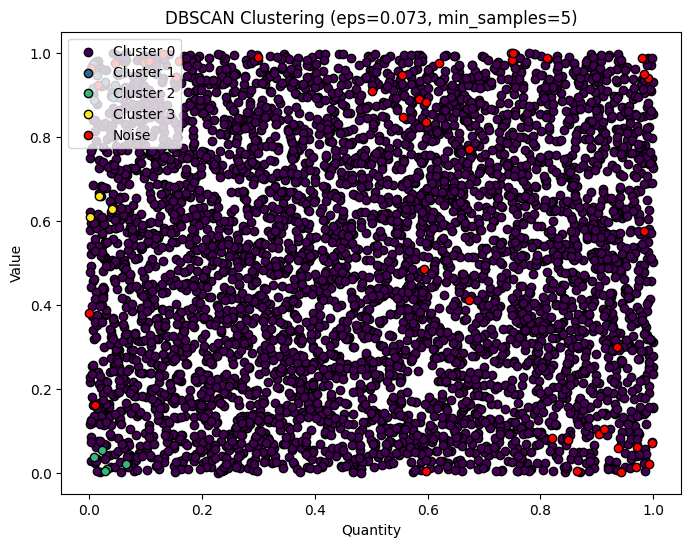

In [171]:
is15_ppd_subset_dbscan = is15_ppd_subset.copy()
is15_ppd_subset_dbscan.reset_index(inplace=True, drop=True)  # Reset index
is15_ppd_subset_dbscan['cluster_number'] = dbscan_model

# Get unique cluster labels (excluding noise -1)
unique_labels = sorted(list(set(dbscan_model) - {-1}))

# Create color map with enough unique colors
colors = plt.cm.get_cmap('viridis', len(unique_labels))

# Plot clusters
plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    cluster_data = is15_ppd_subset_dbscan[is15_ppd_subset_dbscan['cluster_number'] == label]
    plt.scatter(cluster_data['Quantity'], cluster_data['Value'],
                color=colors(i), label=f'Cluster {label}', edgecolors='k')

# Plot noise points if any
noise_data = is15_ppd_subset_dbscan[is15_ppd_subset_dbscan['cluster_number'] == -1]
if len(noise_data) > 0:
    plt.scatter(noise_data['Quantity'], noise_data['Value'],
                color='red', label='Noise', edgecolors='k')

plt.title(f'DBSCAN Clustering (eps={dbscan_cluster.eps}, min_samples={dbscan_cluster.min_samples})')
plt.xlabel('Quantity')
plt.ylabel('Value')
plt.legend()
plt.show()

K-Means Clustering Results:
   k  Silhouette Score  Davies-Bouldin Index
0  2              0.25                  1.63
1  3              0.24                  1.33
2  4              0.26                  1.15
3  5              0.27                  1.14

DBSCAN Clustering Results:
   eps  min_samples  Silhouette Score  Davies-Bouldin Index
0 0.07            5             -0.08                  2.85


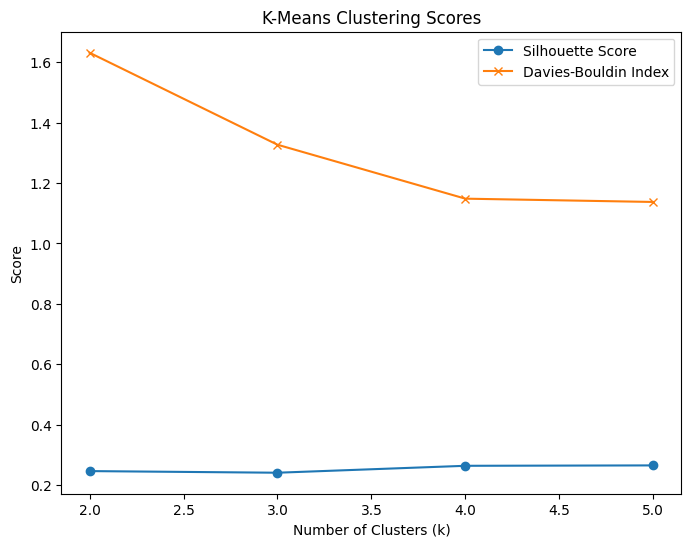

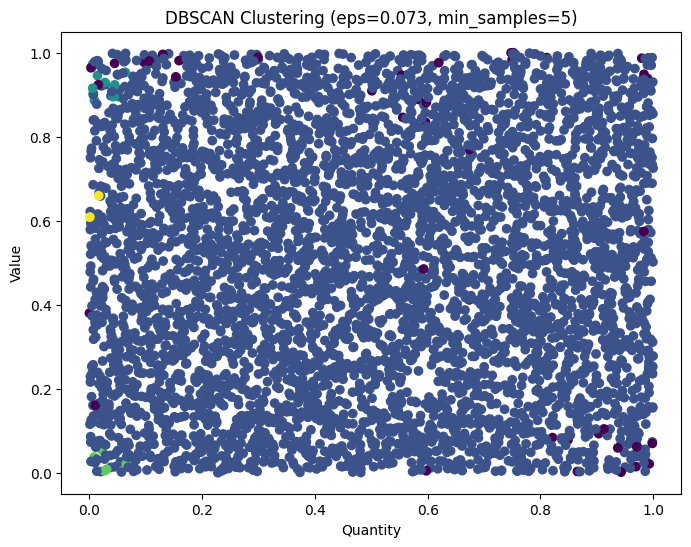

In [172]:
def compare_kmeans_dbscan(data, k_range=range(2, 6)):
    """
    Compares K-Means and DBSCAN clustering models using silhouette and Davies-Bouldin scores.

    Args:
        data (pd.DataFrame): The dataset for clustering.
        k_range (range): The range of k values to try for K-Means.

    Returns:
        None: Prints the comparison results and displays the plots.
    """

    kmeans_results = []
    for k in k_range:
        kmeans = kmclus(n_clusters=k, random_state=55008015)  # Use a consistent random_state
        labels = kmeans.fit_predict(data)
        silhouette = sscore(data, labels)
        db_index = dbscore(data, labels)
        kmeans_results.append([k, silhouette, db_index])

    # DBSCAN
    eps = 0.073  # Fixed eps value as per your requirement
    min_samples = 5  # Fixed min_samples value as per your requirement
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)

    if len(set(labels)) > 1:  # Avoid cases where all points are noise
        silhouette = sscore(data, labels)
        db_index = dbscore(data, labels)
        dbscan_results = [eps, min_samples, silhouette, db_index]
    else:
        dbscan_results = [eps, min_samples, "Not Applicable (All points are noise)", "Not Applicable"]

    # Print results as a table
    print("K-Means Clustering Results:")
    print(pd.DataFrame(kmeans_results, columns=['k', 'Silhouette Score', 'Davies-Bouldin Index']))
    print("\nDBSCAN Clustering Results:")
    print(pd.DataFrame([dbscan_results], columns=['eps', 'min_samples', 'Silhouette Score', 'Davies-Bouldin Index']))

    # Plotting (K-Means)
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, 6), [result[1] for result in kmeans_results], marker='o', label='Silhouette Score')
    plt.plot(range(2, 6), [result[2] for result in kmeans_results], marker='x', label='Davies-Bouldin Index')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Score')
    plt.title('K-Means Clustering Scores')
    plt.legend()
    plt.show()

    # Visualization (DBSCAN - assuming 'Quantity' and 'Value' are suitable columns)
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Quantity'], data['Value'], c=labels, cmap='viridis')
    plt.xlabel('Quantity')
    plt.ylabel('Value')
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.show()


# Example usage (replace with your actual data and columns):
compare_kmeans_dbscan(is15_ppd_subset)

###Model Performance STATS


In [173]:
# prompt: Generate the code that finds out the model performance statistics for both the 5-Cluster K Means and the DBSCAN Clustering we have done above. I need to know the sscore, dbscore, Time Taken to run, Memory used to run.

import time
import tracemalloc

def get_model_performance(model, data, model_name):
    """Calculates and prints model performance statistics."""

    start_time = time.time()
    tracemalloc.start()

    labels = model.fit_predict(data)

    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    end_time = time.time()
    time_taken = end_time - start_time

    if len(set(labels)) > 1:  # Check for valid labels before calculating metrics
        silhouette = sscore(data, labels)
        db_index = dbscore(data, labels)
    else:
        silhouette = "N/A (All points in one cluster or noise)"
        db_index = "N/A (All points in one cluster or noise)"


    print(f"{model_name} Performance:")
    print(f"  Silhouette Score: {silhouette}")
    print(f"  Davies-Bouldin Index: {db_index}")
    print(f"  Time Taken: {time_taken:.4f} seconds")
    print(f"  Memory Used: {peak / 10**6:.2f} MB")

# Example usage for the 5-cluster KMeans model:
get_model_performance(is15_km_5cluster, is15_ppd_subset, "5-Cluster KMeans")

# Example usage for the DBSCAN model:
get_model_performance(dbscan_cluster, is15_ppd_subset, "DBSCAN")

5-Cluster KMeans Performance:
  Silhouette Score: 0.2701525426924807
  Davies-Bouldin Index: 1.0655981331376179
  Time Taken: 0.1128 seconds
  Memory Used: 0.40 MB
DBSCAN Performance:
  Silhouette Score: -0.08422354510353929
  Davies-Bouldin Index: 2.854368777045925
  Time Taken: 0.1083 seconds
  Memory Used: 1.48 MB


###Diagnostics

In [174]:
# K-Means Diagnostics
def kmeans_diagnostics(data, model):
    labels = model.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Correctly count clusters

    # Cluster characteristics
    cluster_characteristics = []
    for i in range(n_clusters):
      cluster_data = data[labels == i]
      # Calculate homogeneity (low standard deviation indicates high homogeneity)
      homogeneity = cluster_data.std().mean()
      cluster_characteristics.append(
          {"cluster_id": i, "homogeneity": homogeneity}
      )

    # Calculate heterogeneity (using distance between cluster centroids)
    centroids = model.cluster_centers_
    distances = np.linalg.norm(centroids[:, np.newaxis, :] - centroids, axis=2)  # Pairwise distance
    np.fill_diagonal(distances, np.inf) # Ignore self distance
    heterogeneity = np.min(distances)

    return pd.DataFrame(cluster_characteristics), heterogeneity


# Example usage for 5-cluster KMeans model:
cluster_characteristics, heterogeneity = kmeans_diagnostics(is15_ppd_subset, is15_km_5cluster)

print("Cluster Characteristics (Homogeneity):")
print(cluster_characteristics)

print("\nHeterogeneity (Min distance between centroids):", heterogeneity)

# Silhouette and Davies-Bouldin scores:
silhouette = sscore(is15_ppd_subset, is15_km_5cluster_model)
db_index = dbscore(is15_ppd_subset, is15_km_5cluster_model)

print(f"\nSilhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {db_index}")

Cluster Characteristics (Homogeneity):
   cluster_id  homogeneity
0           0         0.19
1           1         0.16
2           2         0.18
3           3         0.17
4           4         0.18

Heterogeneity (Min distance between centroids): 0.5454619901485258

Silhouette Score: 0.2701525426924807
Davies-Bouldin Index: 1.0655981331376179
